In [1]:
import ipywidgets as widgets
from IPython.display import display
import nltk 
import math

Porter = nltk.PorterStemmer()
Lancaster = nltk.LancasterStemmer() 

ExpReg = nltk.RegexpTokenizer('(?:[A-Za-z]\.)+|[A-Za-z]+[\-@]\d+(?:\.\d+)?|\d+[A-Za-z]+|\d+(?:[\.\,\-]\d+)?%?|\w+(?:[\-/]\w+)*') # \d : équivalent à [0-9] 
StopWords = nltk.corpus.stopwords.words('english') 



In [2]:

def rsv(query,stemming,preprocessing):
   
    rsv_dict = {}
    
    
    
    file_path = ""
    if preprocessing == "Split":
            match stemming:
                case 'No Stemming':
                    file_path = 'inverse_split.txt'
                    query_terms = list(set([term for term in query.split() if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:              
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:

                                if parts[2] in rsv_dict:
                                                                        
                                    rsv_dict[parts[2]] += float(parts[4])
                                else:

                                    rsv_dict[parts[2]] = float(parts[4])                       
                         
                case 'Porter':
                    file_path = 'inverse_split_porter.txt'
                    query_terms = list(set([Porter.stem(term) for term in query.split() if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:

                                if parts[2] in rsv_dict:
                                                                        
                                    rsv_dict[parts[2]] += float(parts[4])
                                else:

                                    rsv_dict[parts[2]] = float(parts[4])
                case 'Lancaster':
                    file_path = 'inverse_split_lancaster.txt'
                    query_terms = list(set([Lancaster.stem(term) for term in query.split() if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:

                                if parts[2] in rsv_dict:
                                                                        
                                    rsv_dict[parts[2]] += float(parts[4])
                                else:

                                    rsv_dict[parts[2]] = float(parts[4])
    else:
            match stemming:
                case 'No Stemming':
                    file_path = 'inverse_reg.txt'
                    query_terms = list(set([term for term in ExpReg.tokenize(query) if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:

                                if parts[2] in rsv_dict:
                                                                        
                                    rsv_dict[parts[2]] += float(parts[4])
                                else:

                                    rsv_dict[parts[2]] = float(parts[4])
                  
                case 'Porter':
                    file_path = 'inverse_reg_porter.txt'
                    query_terms = list(set([Porter.stem(term) for term in ExpReg.tokenize(query) if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()

                            if parts[1] in  query_terms:# parts[1] is the term

                                if parts[2] in rsv_dict: # parts[2] is the document
                                                                        
                                    rsv_dict[parts[2]] += float(parts[4]) # parts[4] is the wight of the term in the document
                                else:

                                    rsv_dict[parts[2]] = float(parts[4])
                    
                   
                case 'Lancaster':
                    file_path = 'inverse_reg_lancaster.txt'
                    query_terms = list(set([Lancaster.stem(term) for term in ExpReg.tokenize(query) if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:

                                if parts[2] in rsv_dict:
                                                                        
                                    rsv_dict[parts[2]] += float(parts[4])
                                else:
                                   
                                   rsv_dict[parts[2]] = float(parts[4])

    rsv_dict = dict(sorted(rsv_dict.items(),key=lambda item:item[1],reverse=True))
    return rsv_dict

    


In [3]:
my_dict = rsv('Large language models (LLM)','Porter','Reg')
my_dict

{'5': 0.6434526764861874,
 '2': 0.47914011693478853,
 '3': 0.4618931647855281,
 '6': 0.3217263382430937,
 '4': 0.24793200279139374,
 '1': 0.18061799739838874}

In [62]:

def cosine(query,stemming,preprocessing):
   
    som_wi = {}
    som_wi_carre = {}
    cosine_dict = {}
    som_vi_squred =  0
    
    
    
    file_path = ""
    if preprocessing == "Split":
            match stemming:
                case 'No Stemming':
                    file_path = 'inverse_split.txt'
                    query_terms = list(set([term for term in query.split() if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:              
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:

                                if parts[2] in som_wi:
                                                                        
                                    som_wi[parts[2]] += float(parts[4])
                                else:

                                    som_wi[parts[2]] = float(parts[4])
                    
                    for term in query_terms:
                        
                        with open(file_path, 'r', encoding='utf-8') as file:
            
                         
                            lines = file.readlines()
                            for line in lines:
                                parts = line.split()

                                if parts[1] == term:
                                    som_vi_squred += 1
                                    break
                                
                    file_path = 'descripteur_split.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()

                             # clculate the som of wi squared
                            if parts[0] in som_wi_carre:
                                                                                                           
                                    som_wi_carre[parts[0]] += (float(parts[3]) * float(parts[3]))
                            else:

                                    som_wi_carre[parts[0]] = (float(parts[3]) * float(parts[3]))                                
                         
                case 'Porter':
                    file_path = 'inverse_split_porter.txt'
                    query_terms = list(set([Porter.stem(term) for term in query.split() if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:

                                if parts[2] in som_wi:
                                                                        
                                    som_wi[parts[2]] += float(parts[4])
                                else:

                                    som_wi[parts[2]] = float(parts[4])
                    
                    for term in query_terms:
                        
                        with open(file_path, 'r', encoding='utf-8') as file:
            
                         
                            lines = file.readlines()
                            for line in lines:
                                parts = line.split()

                                if parts[1] == term:
                                    som_vi_squred += 1
                                    break
                                
                    file_path = 'descripteur_split_porter.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()

                             # clculate the som of wi squared
                            if parts[0] in som_wi_carre:
                                                                                                           
                                    som_wi_carre[parts[0]] += (float(parts[3]) * float(parts[3]))
                            else:

                                    som_wi_carre[parts[0]] = (float(parts[3]) * float(parts[3]))            
                case 'Lancaster':
                    file_path = 'inverse_split_lancaster.txt'
                    query_terms = list(set([Lancaster.stem(term) for term in query.split() if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:

                                if parts[2] in som_wi:
                                                                        
                                    som_wi[parts[2]] += float(parts[4])
                                else:

                                    som_wi[parts[2]] = float(parts[4])
                    
                    for term in query_terms:
                        
                        with open(file_path, 'r', encoding='utf-8') as file:
            
                         
                            lines = file.readlines()
                            for line in lines:
                                parts = line.split()

                                if parts[1] == term:
                                    som_vi_squred += 1
                                    break

                    
                    file_path = 'descripteur_split_lancaster.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()

                             # clculate the som of wi squared
                            if parts[0] in som_wi_carre:
                                                                                                           
                                    som_wi_carre[parts[0]] += (float(parts[3]) * float(parts[3]))
                            else:

                                    som_wi_carre[parts[0]] = (float(parts[3]) * float(parts[3]))            
                             
    else:
            match stemming:
                case 'No Stemming':
                    file_path = 'inverse_reg.txt'
                    query_terms = list(set([term for term in ExpReg.tokenize(query) if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:

                                if parts[2] in som_wi:
                                                                        
                                    som_wi[parts[2]] += float(parts[4])
                                else:

                                    som_wi[parts[2]] = float(parts[4])
                    
                    for term in query_terms:
                        
                        with open(file_path, 'r', encoding='utf-8') as file:
            
                         
                            lines = file.readlines()
                            for line in lines:
                                parts = line.split()

                                if parts[1] == term:
                                    som_vi_squred += 1
                                    break
                    
                    file_path = 'descripteur_reg.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()

                             # clculate the som of wi squared
                            if parts[0] in som_wi_carre:
                                                                                                           
                                    som_wi_carre[parts[0]] += (float(parts[3]) * float(parts[3]))
                            else:

                                    som_wi_carre[parts[0]] = (float(parts[3]) * float(parts[3]))            
                                
                case 'Porter':
                    file_path = 'inverse_reg_porter.txt'
                    query_terms = list(set([Porter.stem(term) for term in ExpReg.tokenize(query) if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()

                            if parts[1] in  query_terms:
                                # clculate the som of wi 
                                if parts[2] in som_wi:
                                                                        
                                    som_wi[parts[2]] += float(parts[4])
                                else:

                                    som_wi[parts[2]] = float(parts[4])

                                

                    for term in query_terms:
                        
                        with open(file_path, 'r', encoding='utf-8') as file:
            
                         
                            lines = file.readlines()
                            for line in lines:
                                parts = line.split()

                                if parts[1] == term:
                                    som_vi_squred += 1
                                    break
            
            
            
                                

                                
                                
                                
                    file_path = 'descripteur_reg_porter.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()

                             # clculate the som of wi squared
                            if parts[0] in som_wi_carre:
                                                                                                           
                                    som_wi_carre[parts[0]] += (float(parts[3]) * float(parts[3]))
                            else:

                                    som_wi_carre[parts[0]] = (float(parts[3]) * float(parts[3]))
                    
                    
                case 'Lancaster':
                    file_path = 'inverse_reg_lancaster.txt'
                    query_terms = list(set([Lancaster.stem(term) for term in ExpReg.tokenize(query) if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:

                                if parts[2] in som_wi:
                                                                        
                                    som_wi[parts[2]] += float(parts[4])
                                else:

                                    som_wi[parts[2]] = float(parts[4])
                    
                    for term in query_terms:
                        
                        with open(file_path, 'r', encoding='utf-8') as file:
            
                         
                            lines = file.readlines()
                            for line in lines:
                                parts = line.split()

                                if parts[1] == term:
                                    som_vi_squred += 1
                                    break
                                
                    file_path = 'descripteur_reg_lancaster.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()

                             # clculate the som of wi squared
                            if parts[0] in som_wi_carre:
                                                                                                           
                                    som_wi_carre[parts[0]] += (float(parts[3]) * float(parts[3]))
                            else:

                                    som_wi_carre[parts[0]] = (float(parts[3]) * float(parts[3]))    
                           

    
    print('vi',som_vi_squred)
    for doc,v in som_wi.items():
        cosine_dict[doc] =  som_wi[doc] / ( math.sqrt(som_vi_squred) * math.sqrt(som_wi_carre[doc]))
    
    cosine_dict = dict(sorted(cosine_dict.items(),key=lambda item:item[1],reverse=True))
    return cosine_dict

    


In [33]:
my_dict = cosine('Ranking documnets using LLMs','Porter','Reg')
my_dict

vi 3


{'2': 0.36059314302940165,
 '5': 0.14456576390061102,
 '6': 0.1217244594306369,
 '1': 0.10828123288903387,
 '4': 0.07756421329768295,
 '3': 0.03657404343700965}

In [4]:

def jaccard(query,stemming,preprocessing):
   
    som_wi = {}
    som_wi_carre = {}
    jaccard_dict = {}
    som_vi_squred = 0
    
    
    
    file_path = ""
    if preprocessing == "Split":
            match stemming:
                case 'No Stemming':
                    file_path = 'inverse_split.txt'
                    query_terms = list(set([term for term in query.split() if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:              
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:

                                if parts[2] in som_wi:
                                                                        
                                    som_wi[parts[2]] += float(parts[4])
                                else:

                                    som_wi[parts[2]] = float(parts[4])

                    for term in query_terms:
                        
                        with open(file_path, 'r', encoding='utf-8') as file:
            
                         
                            lines = file.readlines()
                            for line in lines:
                                parts = line.split()

                                if parts[1] == term:
                                    som_vi_squred += 1
                                    break
                                
                    file_path = 'descripteur_split.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()

                             # clculate the som of wi squared
                            if parts[0] in som_wi_carre:
                                                                                                           
                                    som_wi_carre[parts[0]] += (float(parts[3]) * float(parts[3]))
                            else:

                                    som_wi_carre[parts[0]] = (float(parts[3]) * float(parts[3]))                                
                         
                case 'Porter':
                    file_path = 'inverse_split_porter.txt'
                    query_terms = list(set([Porter.stem(term) for term in query.split() if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:

                                if parts[2] in som_wi:
                                                                        
                                    som_wi[parts[2]] += float(parts[4])
                                else:

                                    som_wi[parts[2]] = float(parts[4])
                    
                    for term in query_terms:
                        
                        with open(file_path, 'r', encoding='utf-8') as file:
            
                         
                            lines = file.readlines()
                            for line in lines:
                                parts = line.split()

                                if parts[1] == term:
                                    som_vi_squred += 1
                                    break
                    
                    file_path = 'descripteur_split_porter.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()

                             # clculate the som of wi squared
                            if parts[0] in som_wi_carre:
                                                                                                           
                                    som_wi_carre[parts[0]] += (float(parts[3]) * float(parts[3]))
                            else:

                                    som_wi_carre[parts[0]] = (float(parts[3]) * float(parts[3]))            
                                
                case 'Lancaster':
                    file_path = 'inverse_split_lancaster.txt'
                    query_terms = list(set([Lancaster.stem(term) for term in query.split() if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:

                                if parts[2] in som_wi:
                                                                        
                                    som_wi[parts[2]] += float(parts[4])
                                else:

                                    som_wi[parts[2]] = float(parts[4])
                    
                    for term in query_terms:
                        
                        with open(file_path, 'r', encoding='utf-8') as file:
            
                         
                            lines = file.readlines()
                            for line in lines:
                                parts = line.split()

                                if parts[1] == term:
                                    som_vi_squred += 1
                                    break
                                
                    file_path = 'descripteur_split_lancaster.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()

                             # clculate the som of wi squared
                            if parts[0] in som_wi_carre:
                                                                                                           
                                    som_wi_carre[parts[0]] += (float(parts[3]) * float(parts[3]))
                            else:

                                    som_wi_carre[parts[0]] = (float(parts[3]) * float(parts[3]))            
    else:
            match stemming:
                case 'No Stemming':
                    file_path = 'inverse_reg.txt'
                    query_terms = list(set([term for term in ExpReg.tokenize(query) if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:

                                if parts[2] in som_wi:
                                                                        
                                    som_wi[parts[2]] += float(parts[4])
                                else:

                                    som_wi[parts[2]] = float(parts[4])
                    for term in query_terms:
                        
                        with open(file_path, 'r', encoding='utf-8') as file:
            
                         
                            lines = file.readlines()
                            for line in lines:
                                parts = line.split()

                                if parts[1] == term:
                                    som_vi_squred += 1
                                    break
                                
                    file_path = 'descripteur_reg.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()

                             # clculate the som of wi squared
                            if parts[0] in som_wi_carre:
                                                                                                           
                                    som_wi_carre[parts[0]] += (float(parts[3]) * float(parts[3]))
                            else:

                                    som_wi_carre[parts[0]] = (float(parts[3]) * float(parts[3]))            
                case 'Porter':
                    file_path = 'inverse_reg_porter.txt'
                    query_terms = list(set([Porter.stem(term) for term in ExpReg.tokenize(query) if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()

                            if parts[1] in  query_terms:
                                # clculate the som of wi 
                                if parts[2] in som_wi:
                                                                        
                                    som_wi[parts[2]] += float(parts[4])
                                else:

                                    som_wi[parts[2]] = float(parts[4])
                    
                    for term in query_terms:
                        
                        with open(file_path, 'r', encoding='utf-8') as file:
            
                         
                            lines = file.readlines()
                            for line in lines:
                                parts = line.split()

                                if parts[1] == term:
                                    som_vi_squred += 1
                                    break
                                
                    file_path = 'descripteur_reg_porter.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()

                            

                             # clculate the som of wi squared
                            if parts[0] in som_wi_carre:
                                                                                                           
                                    som_wi_carre[parts[0]] += (float(parts[3]) * float(parts[3]))
                            else:

                                    som_wi_carre[parts[0]] = (float(parts[3]) * float(parts[3]))

                                    
                    
                    
                case 'Lancaster':
                    file_path = 'inverse_reg_lancaster.txt'
                    query_terms = list(set([Lancaster.stem(term) for term in ExpReg.tokenize(query) if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:

                                if parts[2] in som_wi:
                                                                        
                                    som_wi[parts[2]] += float(parts[4])
                                else:

                                    som_wi[parts[2]] = float(parts[4])

                    for term in query_terms:
                        
                        with open(file_path, 'r', encoding='utf-8') as file:
            
                         
                            lines = file.readlines()
                            for line in lines:
                                parts = line.split()

                                if parts[1] == term:
                                    som_vi_squred += 1
                                    break
                                
                    file_path = 'descripteur_reg_lancaster.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()

                             # clculate the som of wi squared
                            if parts[0] in som_wi_carre:
                                                                                                           
                                    som_wi_carre[parts[0]] += (float(parts[3]) * float(parts[3]))
                            else:

                                    som_wi_carre[parts[0]] = (float(parts[3]) * float(parts[3]))            

   
    
    for doc,v in som_wi.items():
        jaccard_dict[doc] =  som_wi[doc] / ( som_vi_squred + som_wi_carre[doc] - som_wi[doc])
    
    jaccard_dict = dict(sorted(jaccard_dict.items(),key=lambda item:item[1],reverse=True))
    return jaccard_dict

    


In [39]:
my_dict = jaccard('Ranking documnets using LLMs','Porter','Reg')
my_dict

{'2': 0.21982563356714666,
 '5': 0.07780405871287085,
 '6': 0.06347912118488071,
 '1': 0.05723930538097438,
 '4': 0.03683976214683828,
 '3': 0.018058171658908724}

In [63]:

def bm25(query,stemming,preprocessing,K,B):
   
    dl = {}
    avdl = 0
    freq = []
    n = {}
    bm25_dict = {}
    N = 6
    
    #initialization of the frequencies dictionnaries of each document 
    for i in range(6):
         freq.append({})
    
    
    
    
    file_path = ""
    if preprocessing == "Split":
            match stemming:
                case 'No Stemming':
                    file_path = 'inverse_split.txt'
                    query_terms = list(set([term for term in query.split() if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:              
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:
                                # calculate the sum of frequncies of the term  "parts[1]" in each document "parts[2]"
                                if parts[1] not in freq[int(parts[2])-1]:
                                                                        
                                    freq[int(parts[2])-1][parts[1]] = int(parts[3])
                                

                                # calculating the number of documents in which term parts[1] appear
                                if parts[1]  in n:
                                                                        
                                    n[parts[1]] +=  1
                                
                                else:
                                    n[parts[1]] =  1
                                
                    file_path = 'descripteur_split.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            
                            avdl += int(parts[2])
                            

                            # calculating the sum of frequencies for each document 
                            if parts[0] in dl:
                                                                                                           
                                    dl[parts[0]] += int(parts[2])
                            else:

                                    dl[parts[0]] = int(parts[2])                                
                         
                case 'Porter':
                    file_path = 'inverse_split_porter.txt'
                    query_terms = list(set([Porter.stem(term) for term in query.split() if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:
                                # calculate the sum of frequncies of the term  "parts[1]" in each document "parts[2]"
                                if parts[1] not in freq[int(parts[2])-1]:
                                                                        
                                    freq[int(parts[2])-1][parts[1]] = int(parts[3])
                                

                                # calculating the number of documents in which term parts[1] appear
                                if parts[1]  in n:
                                                                        
                                    n[parts[1]] +=  1
                                
                                else:
                                    n[parts[1]] =  1
                    
                    file_path = 'descripteur_split_porter.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            
                            avdl += int(parts[2])
                            

                            # calculating the sum of frequencies for each document 
                            if parts[0] in dl:
                                                                                                           
                                    dl[parts[0]] += int(parts[2])
                            else:

                                    dl[parts[0]] = int(parts[2])            
                                
                case 'Lancaster':
                    file_path = 'inverse_split_lancaster.txt'
                    query_terms = list(set([Lancaster.stem(term) for term in query.split() if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:
                                # calculate the sum of frequncies of the term  "parts[1]" in each document "parts[2]"
                                if parts[1] not in freq[int(parts[2])-1]:
                                                                        
                                    freq[int(parts[2])-1][parts[1]] = int(parts[3])
                                

                                # calculating the number of documents in which term parts[1] appear
                                if parts[1]  in n:
                                                                        
                                    n[parts[1]] +=  1
                                
                                else:
                                    n[parts[1]] =  1
                                
                    file_path = 'descripteur_split_lancaster.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            
                            avdl += int(parts[2])
                            

                            # calculating the sum of frequencies for each document 
                            if parts[0] in dl:
                                                                                                           
                                    dl[parts[0]] += int(parts[2])
                            else:

                                    dl[parts[0]] = int(parts[2])            
    else:
            match stemming:
                case 'No Stemming':
                    file_path = 'inverse_reg.txt'
                    query_terms = list(set([term for term in ExpReg.tokenize(query) if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:
                                # calculate the sum of frequncies of the term  "parts[1]" in each document "parts[2]"
                                if parts[1] not in freq[int(parts[2])-1]:
                                                                        
                                    freq[int(parts[2])-1][parts[1]] = int(parts[3])
                                

                                # calculating the number of documents in which term parts[1] appear
                                if parts[1]  in n:
                                                                        
                                    n[parts[1]] +=  1
                                
                                else:
                                    n[parts[1]] =  1
                                
                    file_path = 'descripteur_reg.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            
                            avdl += int(parts[2])
                            

                            # calculating the sum of frequencies for each document 
                            if parts[0] in dl:
                                                                                                           
                                    dl[parts[0]] += int(parts[2])
                            else:

                                    dl[parts[0]] = int(parts[2])           
                case 'Porter':
                    file_path = 'inverse_reg_porter.txt'
                    query_terms = list(set([Porter.stem(term) for term in ExpReg.tokenize(query) if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                    
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()

                            if parts[1] in  query_terms:
                                # calculate the sum of frequncies of the term  "parts[1]" in each document "parts[2]"
                                if parts[1] not in freq[int(parts[2])-1]:
                                                                        
                                    freq[int(parts[2])-1][parts[1]] = int(parts[3])
                                

                                # calculating the number of documents in which term parts[1] appear
                                if parts[1]  in n:
                                                                        
                                    n[parts[1]] +=  1
                                
                                else:
                                    n[parts[1]] =  1
                                     
                       
                    print(n)           
                    file_path = 'descripteur_reg_porter.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            
                            avdl += int(parts[2])
                            

                            # calculating the sum of frequencies for each document 
                            if parts[0] in dl:
                                                                                                           
                                    dl[parts[0]] += int(parts[2])
                            else:

                                    dl[parts[0]] = int(parts[2])
                    print(dl)
                                  
                    
                case 'Lancaster':
                    file_path = 'inverse_reg_lancaster.txt'
                    query_terms = list(set([Lancaster.stem(term) for term in ExpReg.tokenize(query) if term.lower() not in StopWords]))
                    with open(file_path, 'r', encoding='utf-8') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            if parts[1] in  query_terms:
                                # calculate the sum of frequncies of the term  "parts[1]" in each document "parts[2]"
                                if parts[1] not in freq[int(parts[2])-1]:
                                                                        
                                    freq[int(parts[2])-1][parts[1]] = int(parts[3])
                                

                                # calculating the number of documents in which term parts[1] appear
                                if parts[1]  in n:
                                                                        
                                    n[parts[1]] +=  1
                                
                                else:
                                    n[parts[1]] =  1
                                
                    file_path = 'descripteur_reg_lancaster.txt'
                    
                    with open(file_path, 'r', encoding='utf-8') as file:
                         
                        lines = file.readlines()
                        for line in lines:
                            parts = line.split()
                            
                            avdl += int(parts[2])
                            

                            # calculating the sum of frequencies for each document 
                            if parts[0] in dl:
                                                                                                           
                                    dl[parts[0]] += int(parts[2])
                            else:

                                    dl[parts[0]] = int(parts[2])           

    avdl /= N
    for i  in range(len(freq)):
                         sum = 0.0
                         for term, f in freq[i].items():
                              print(f'{term}:{f}')
                              sum += ( f / ( K * ( (1-B) + B * ( dl[str(i+1)] / avdl) ) + f ) ) * math.log10( ( len(freq) - n[term] + 0.5) /(n[term] + 0.5))                         
                         bm25_dict[str(i+1)] = sum
                         
    bm25_dict = dict(sorted(bm25_dict.items(),key=lambda item:item[1],reverse=True))
    return bm25_dict

    


In [22]:
my_dict = bm25('LLM-based solutions for information retrieval','Porter','Reg',1.50,0.75)
my_dict

{'retriev': 2, 'solut': 1, 'llm-base': 3, 'inform': 4}
{'1': 113, '2': 138, '3': 134, '4': 131, '5': 151, '6': 121}
retriev:1
solut:3
llm-base:2
llm-base:2
inform:1
retriev:5
inform:2
inform:3
llm-base:1
inform:1


{'2': 0.3714669065877922,
 '1': 0.10895313961890599,
 '4': 0.05046066014145881,
 '3': -0.10118447385382555,
 '6': -0.10585698409230639,
 '5': -0.16404055781562094}

In [64]:
def validate_logic_query(query):
    # Tokenize the query
    tokens = ExpReg.tokenize(query) 
    operators = {'AND', 'OR', 'NOT'}
    valid = True
    
    #  empty query or single invalid operator or query that ends with an operator 
    if not tokens or tokens[0] in {'AND', 'OR'} or tokens[-1] in operators:
        return False
    
  
    expect_term = True  # to expect a term or not 
    previous_token = None

    for token in tokens:
        if token in operators:
            # to Check invalid operator sequences
            if previous_token in operators:
                if token != 'NOT' or previous_token == 'NOT':
                    return False
            
            if token in {'AND', 'OR'}:
                # AND/OR must follow a term
                if expect_term:
                    return False
                expect_term = True  # After AND/OR, we expect a term
            elif token == 'NOT':
                # NOT must precede a term 
                expect_term = True

        else:
            # Token is a term
            if not expect_term:
                return False
            expect_term = False  # After a term, we expect an operator
        
        previous_token = token

    
    return valid


# Test cases
valid_queries = [
    "Terme",
    "Terme AND Terme",
    "Terme OR Terme",
    "Terme AND Terme OR Terme",
    "NOT Terme",
    "NOT Terme AND Terme",
    "NOT Terme OR NOT Terme",
    "Terme AND NOT Terme",
    "NOT Terme AND Terme OR NOT Terme"
]

invalid_queries = [
    "AND",
    "OR",
    "Terme Terme",
    "AND Terme",
    "Terme OR",
    "AND OR Terme",
    "Terme AND OR Terme",
    "Terme AND Terme AND",
    "NOT",
    "NOT NOT Terme",
    "NOT AND Terme",
    "Terme AND NOT",
    "Terme AND TERME NOT"
]

print("Valid queries:")
for q in valid_queries:
    print(f"{q}: {validate_logic_query(q)}")

print("\nInvalid queries:")
for q in invalid_queries:
    print(f"{q}: {validate_logic_query(q)}")


Valid queries:
Terme: True
Terme AND Terme: True
Terme OR Terme: True
Terme AND Terme OR Terme: True
NOT Terme: True
NOT Terme AND Terme: True
NOT Terme OR NOT Terme: True
Terme AND NOT Terme: True
NOT Terme AND Terme OR NOT Terme: True

Invalid queries:
AND: False
OR: False
Terme Terme: False
AND Terme: False
Terme OR: False
AND OR Terme: False
Terme AND OR Terme: False
Terme AND Terme AND: False
NOT: False
NOT NOT Terme: False
NOT AND Terme: False
Terme AND NOT: False
Terme AND TERME NOT: False


In [65]:
from sympy.logic.boolalg import Or, And, Not
from sympy import symbols, simplify_logic  

def boolean_model(query,stemming,preprocessing):
   
    boolean_dict = {}
    terms_dictionnaries = []
    N = 6
 
 
 
    
    
    file_path = ""
    if preprocessing == "Split":
            match stemming:
                case 'No Stemming':
                   
                    if not validate_logic_query(query):
                        return None

                    
                    file_path = 'inverse_split.txt'
                    query_terms = list([term for term in query.split() if term.lower() not in StopWords])                     
                    print('Query terms:', query_terms)

                    # Extracting query terms without operators
                    query_terms_without_operators = [term for term in query_terms if term not in ['and', 'or', 'not']]
                    print('Terms without operators:', query_terms_without_operators)

                    # Initialize variables
                    operators = ['and', 'or', 'not']
                    terms_dictionaries = [[] for _ in range(N)] 

                    # looping through the terms of the query to calculate for each document the terms of the query that it contains
                    for term in query_terms_without_operators:
                         with open(file_path, 'r', encoding='utf-8') as file:
                              lines = file.readlines()
                              for line in lines:
                                   parts = line.split()
                    
                                   if parts[1] == term:
                                        doc_id = int(parts[2]) - 1  
                                        terms_dictionaries[doc_id].append(term)

                    print('Terms dictionaries:', terms_dictionaries)

                    for i in range(N):
                        query_modified = query
                        query_terms_without_stemming = [term for term in query.split() if term.lower() not in operators]
                        
                        for term in query_terms_without_stemming:
                              #print(term)
                              #print('\n')
                              # Replacing terms with 'True' or 'False' based on their presence in the document
                            
                              if term in terms_dictionaries[i]:
                                   query_modified = query_modified.replace(term, 'True')
                              else:
                                   query_modified = query_modified.replace(term, 'False')
    
                        query_modified = query_modified.replace('OR', 'or')
                        query_modified = query_modified.replace('AND', 'and')
                        query_modified = query_modified.replace('NOT', 'not')

                        print(f"Document {i + 1} Final Query for Simplification: {query_modified}")

                        

                        try:
                            boolean_dict[i] = eval(query_modified)
                        except Exception as e:
                           print(f"Error evaluating query for document {i + 1}: {e}")
                           boolean_dict[i] = False  

                    print('Boolean Dictionary:', boolean_dict)                                
                         
                case 'Porter':
                    if not validate_logic_query(query):
                        return None

                    
                    file_path = 'inverse_split_porter.txt'
                    query_terms = list([Porter.stem(term) for term in query.split() if term.lower() not in StopWords])                     
                    print('Query terms:', query_terms)

                    # Extracting query terms without operators
                    query_terms_without_operators = [term for term in query_terms if term not in ['and', 'or', 'not']]
                    print('Terms without operators:', query_terms_without_operators)

                    # Initialize variables
                    operators = ['and', 'or', 'not']
                    terms_dictionaries = [[] for _ in range(N)] 

                    # looping through the terms of the query to calculate for each document the terms of the query that it contains
                    for term in query_terms_without_operators:
                         with open(file_path, 'r', encoding='utf-8') as file:
                              lines = file.readlines()
                              for line in lines:
                                   parts = line.split()
                    
                                   if parts[1] == term:
                                        doc_id = int(parts[2]) - 1  
                                        terms_dictionaries[doc_id].append(term)

                    print('Terms dictionaries:', terms_dictionaries)

                    for i in range(N):
                        query_modified = query
                        query_terms_without_stemming = [term for term in query.split() if term.lower() not in operators]
                        
                        for term in query_terms_without_stemming:
                              #print(term)
                              #print('\n')
                              # Replacing terms with 'True' or 'False' based on their presence in the document
                            
                              if Porter.stem(term) in terms_dictionaries[i]:
                                   query_modified = query_modified.replace(term, 'True')
                              else:
                                   query_modified = query_modified.replace(term, 'False')
    
                        query_modified = query_modified.replace('OR', 'or')
                        query_modified = query_modified.replace('AND', 'and')
                        query_modified = query_modified.replace('NOT', 'not')

                        print(f"Document {i + 1} Final Query for Simplification: {query_modified}")

                        

                        try:
                            boolean_dict[i] = eval(query_modified)
                        except Exception as e:
                           print(f"Error evaluating query for document {i + 1}: {e}")
                           boolean_dict[i] = False  

                    print('Boolean Dictionary:', boolean_dict)            
                                
                case 'Lancaster':
                    if not validate_logic_query(query):
                        return None

                    
                    file_path = 'inverse_split_lancaster.txt'
                    query_terms = list([Lancaster.stem(term) for term in query.split() if term.lower() not in StopWords])                     
                    print('Query terms:', query_terms)

                    # Extracting query terms without operators
                    query_terms_without_operators = [term for term in query_terms if term not in ['and', 'or', 'not']]
                    print('Terms without operators:', query_terms_without_operators)

                    # Initialize variables
                    operators = ['and', 'or', 'not']
                    terms_dictionaries = [[] for _ in range(N)] 

                    # looping through the terms of the query to calculate for each document the terms of the query that it contains
                    for term in query_terms_without_operators:
                         with open(file_path, 'r', encoding='utf-8') as file:
                              lines = file.readlines()
                              for line in lines:
                                   parts = line.split()
                    
                                   if parts[1] == term:
                                        doc_id = int(parts[2]) - 1  
                                        terms_dictionaries[doc_id].append(term)

                    print('Terms dictionaries:', terms_dictionaries)

                    for i in range(N):
                        query_modified = query
                        query_terms_without_stemming = [term for term in query.split() if term.lower() not in operators]
                        
                        for term in query_terms_without_stemming:
                              #print(term)
                              #print('\n')
                              # Replacing terms with 'True' or 'False' based on their presence in the document
                            
                              if Lancaster.stem(term) in terms_dictionaries[i]:
                                   query_modified = query_modified.replace(term, 'True')
                              else:
                                   query_modified = query_modified.replace(term, 'False')
    
                        query_modified = query_modified.replace('OR', 'or')
                        query_modified = query_modified.replace('AND', 'and')
                        query_modified = query_modified.replace('NOT', 'not')

                        print(f"Document {i + 1} Final Query for Simplification: {query_modified}")

                        

                        try:
                            boolean_dict[i] = eval(query_modified)
                        except Exception as e:
                           print(f"Error evaluating query for document {i + 1}: {e}")
                           boolean_dict[i] = False  

                    print('Boolean Dictionary:', boolean_dict)             
    else:
            match stemming:
                case 'No Stemming':
                    if not validate_logic_query(query):
                        return None

                    
                    file_path = 'inverse_reg.txt'
                    query_terms = list([term for term in ExpReg.tokenize(query) if term.lower() not in StopWords])                     
                    print('Query terms:', query_terms)

                    # Extracting query terms without operators
                    query_terms_without_operators = [term for term in query_terms if term not in ['and', 'or', 'not']]
                    print('Terms without operators:', query_terms_without_operators)

                    # Initialize variables
                    operators = ['and', 'or', 'not']
                    terms_dictionaries = [[] for _ in range(N)] 

                    # looping through the terms of the query to calculate for each document the terms of the query that it contains
                    for term in query_terms_without_operators:
                         with open(file_path, 'r', encoding='utf-8') as file:
                              lines = file.readlines()
                              for line in lines:
                                   parts = line.split()
                    
                                   if parts[1] == term:
                                        doc_id = int(parts[2]) - 1  
                                        terms_dictionaries[doc_id].append(term)

                    print('Terms dictionaries:', terms_dictionaries)

                    for i in range(N):
                        query_modified = query
                        query_terms_without_stemming = [term for term in ExpReg.tokenize(query) if term.lower() not in operators]
                        
                        for term in query_terms_without_stemming:
                              #print(term)
                              #print('\n')
                              # Replacing terms with 'True' or 'False' based on their presence in the document
                            
                              if term in terms_dictionaries[i]:
                                   query_modified = query_modified.replace(term, 'True')
                              else:
                                   query_modified = query_modified.replace(term, 'False')
    
                        query_modified = query_modified.replace('OR', 'or')
                        query_modified = query_modified.replace('AND', 'and')
                        query_modified = query_modified.replace('NOT', 'not')

                        print(f"Document {i + 1} Final Query for Simplification: {query_modified}")

                        

                        try:
                            boolean_dict[i] = eval(query_modified)
                        except Exception as e:
                           print(f"Error evaluating query for document {i + 1}: {e}")
                           boolean_dict[i] = False  

                    print('Boolean Dictionary:', boolean_dict)            
                case 'Porter':

                    
                    if not validate_logic_query(query):
                        return None

                    
                    file_path = 'inverse_reg_porter.txt'
                    query_terms = list([Porter.stem(term) for term in ExpReg.tokenize(query) if term.lower() not in StopWords])                     
                    print('Query terms:', query_terms)

                    # Extracting query terms without operators
                    query_terms_without_operators = [term for term in query_terms if term not in ['and', 'or', 'not']]
                    print('Terms without operators:', query_terms_without_operators)

                    # Initialize variables
                    operators = ['and', 'or', 'not']
                    terms_dictionaries = [[] for _ in range(N)] 

                    # looping through the terms of the query to calculate for each document the terms of the query that it contains
                    for term in query_terms_without_operators:
                         with open(file_path, 'r', encoding='utf-8') as file:
                              lines = file.readlines()
                              for line in lines:
                                   parts = line.split()
                    
                                   if parts[1] == term:
                                        doc_id = int(parts[2]) - 1  
                                        terms_dictionaries[doc_id].append(term)

                    print('Terms dictionaries:', terms_dictionaries)

                    for i in range(N):
                        query_modified = query
                        query_terms_without_stemming = [term for term in ExpReg.tokenize(query) if term.lower() not in operators]
                        
                        for term in query_terms_without_stemming:
                              #print(term)
                              #print('\n')
                              # Replacing terms with 'True' or 'False' based on their presence in the document
                            
                              if Porter.stem(term) in terms_dictionaries[i]:
                                   query_modified = query_modified.replace(term, 'True')
                              else:
                                   query_modified = query_modified.replace(term, 'False')
    
                        query_modified = query_modified.replace('OR', 'or')
                        query_modified = query_modified.replace('AND', 'and')
                        query_modified = query_modified.replace('NOT', 'not')

                        print(f"Document {i + 1} Final Query for Simplification: {query_modified}")

                        

                        try:
                            boolean_dict[i+1] = eval(query_modified)
                        except Exception as e:
                           print(f"Error evaluating query for document {i + 1}: {e}")
                           boolean_dict[i+1] = False  

                    print('Boolean Dictionary:', boolean_dict)
                    
                 
                case 'Lancaster':
                    if not validate_logic_query(query):
                        return None

                    
                    file_path = 'inverse_reg_lancaster.txt'
                    query_terms = list([Lancaster.stem(term) for term in ExpReg.tokenize(query) if term.lower() not in StopWords])                     
                    print('Query terms:', query_terms)

                    # Extracting query terms without operators
                    query_terms_without_operators = [term for term in query_terms if term not in ['and', 'or', 'not']]
                    print('Terms without operators:', query_terms_without_operators)

                    # Initialize variables
                    operators = ['and', 'or', 'not']
                    terms_dictionaries = [[] for _ in range(N)] 

                    # looping through the terms of the query to calculate for each document the terms of the query that it contains
                    for term in query_terms_without_operators:
                         with open(file_path, 'r', encoding='utf-8') as file:
                              lines = file.readlines()
                              for line in lines:
                                   parts = line.split()
                    
                                   if parts[1] == term:
                                        doc_id = int(parts[2]) - 1  
                                        terms_dictionaries[doc_id].append(term)

                    print('Terms dictionaries:', terms_dictionaries)

                    for i in range(N):
                        query_modified = query
                        query_terms_without_stemming = [term for term in ExpReg.tokenize(query) if term.lower() not in operators]
                        
                        for term in query_terms_without_stemming:
                              #print(term)
                              #print('\n')
                              # Replacing terms with 'True' or 'False' based on their presence in the document
                            
                              if Lancaster.stem(term) in terms_dictionaries[i]:
                                   query_modified = query_modified.replace(term, 'True')
                              else:
                                   query_modified = query_modified.replace(term, 'False')
    
                        query_modified = query_modified.replace('OR', 'or')
                        query_modified = query_modified.replace('AND', 'and')
                        query_modified = query_modified.replace('NOT', 'not')

                        print(f"Document {i + 1} Final Query for Simplification: {query_modified}")

                        

                        try:
                            boolean_dict[i+1] = eval(query_modified)
                        except Exception as e:
                           print(f"Error evaluating query for document {i + 1}: {e}")
                           boolean_dict[i+1] = False  

                    print('Boolean Dictionary:', boolean_dict)           

    return boolean_dict

    


In [20]:
my_dict = boolean_model('ChatGPT OR GPT-3.5','Porter','Reg')

Query terms: ['chatgpt', 'gpt-3.5']
Terms without operators: ['chatgpt', 'gpt-3.5']
Terms dictionaries: [[], ['chatgpt'], [], [], [], ['gpt-3.5']]
Document 1 Final Query for Simplification: False or False
Document 2 Final Query for Simplification: True or False
Document 3 Final Query for Simplification: False or False
Document 4 Final Query for Simplification: False or False
Document 5 Final Query for Simplification: False or False
Document 6 Final Query for Simplification: False or True
Boolean Dictionary: {1: False, 2: True, 3: False, 4: False, 5: False, 6: True}


In [58]:
import numpy as np
def model_evaluation(query,model_results):

    model_returned_docs = list(model_results.keys())
    real_relevant_docs = []
    query_id = 0
    
    print(model_returned_docs)
    file_path = 'Queries.txt'
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        cpt = 0
        for line in lines:
            cpt += 1
            if line == query:
                query_id = cpt
                break
    
    print(query_id)
    file_path = 'Judgements.txt'
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.split()
            if int(parts[0]) == query_id:
                real_relevant_docs.append(parts[1])
    
    print(real_relevant_docs)
    
    selected_relevant_docs = 0
    selected_relevant_docs_rang_5 = 0
    selected_relevant_docs_rang_10 = 0

    for i,doc in enumerate(model_returned_docs):

        if i < 5:
            if doc in real_relevant_docs:
                selected_relevant_docs_rang_5 += 1
                selected_relevant_docs_rang_10 += 1
                selected_relevant_docs += 1
        elif i < 10:
            if doc in real_relevant_docs:
                selected_relevant_docs_rang_10 += 1
                selected_relevant_docs += 1
        else:
            if doc in real_relevant_docs:
                selected_relevant_docs += 1
    
    print('selected_relevant_docs:',selected_relevant_docs)
    p = selected_relevant_docs / len(model_returned_docs)

    p5 = selected_relevant_docs_rang_5 / 5

    p10 = selected_relevant_docs_rang_10 / 10

    r = selected_relevant_docs / len(real_relevant_docs)

    F_score = ( 2 * p * r ) / ( p + r)

    recalls = []
    precesions = []
    selected_relevant_docs = 0
    print('len(real_relevant_docs)',len(real_relevant_docs))
    for i,doc in enumerate(model_returned_docs):
        
        if doc in real_relevant_docs:
            selected_relevant_docs += 1
        print('i + 1 ', i + 1 )
        print('selected_relevant_docs' , selected_relevant_docs)
        p = selected_relevant_docs / ( i + 1 )
        r = selected_relevant_docs / len(real_relevant_docs)
        precesions.append(p)
        recalls.append(r)
    
    #interpolation
    
    
    recalls2 = [0, 0.2, 0.4, 0.6, 0.8, 1.0]


    precisions2 = []
    for r2 in recalls2:
        max_precision = 0
        for r, p in zip(recalls, precesions):
                if r >= r2:
                    max_precision = max(max_precision, p)
        precisions2.append(max_precision)





    return p , p5 , p10 , r ,  F_score , precesions , recalls , precisions2 , recalls2

In [15]:
query = 'What recent studies explore query expansion through embeddings?'
my_dict = rsv(query,'Porter','Reg')
my_dict

{'4': 0.6029509020069551,
 '1': 0.3183520069376301,
 '6': 0.23063725500178212,
 '5': 0.13264666955734586,
 '2': 0.06632333477867293}

In [ ]:
p , p5 , p10 , r ,  F_score , precesions , recalls , precisions2 , recalls2 = model_evaluation(query,my_dict)
print(f'precision = {p} , p@5 = {p5} , p@10 = {p10} , recall = {r} , F_score = {F_score}')
print('precesions',precesions)
print('recalls',recalls)
print('interpolation')
print('precesions2',precisions2)
print('recalls2',recalls2)

['4', '1', '6', '5', '2']
2
['2', '6']
selected_relevant_docs: 2
len(real_relevant_docs) 2
i + 1  1
selected_relevant_docs 0
i + 1  2
selected_relevant_docs 0
i + 1  3
selected_relevant_docs 1
i + 1  4
selected_relevant_docs 1
i + 1  5
selected_relevant_docs 2
precision = 0.4 , p@5 = 0.4 , p@10 = 0.2 , recall = 1.0 , F_score = 0.5714285714285715
precesions [0.0, 0.0, 0.3333333333333333, 0.25, 0.4]
recalls [0.0, 0.0, 0.5, 0.5, 1.0]
interpolation
precesions2 [0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
recalls2 [0, 0.2, 0.4, 0.6, 0.8, 1.0]


In [38]:
import matplotlib.pyplot as plt

def show_plot(recalls, precesions):
    plt.figure(figsize=(5, 3))
    plt.title(f"Curve Recall/Precision")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.plot(recalls, precesions, color='teal', marker='o')
    plt.tight_layout()
    plt.show()

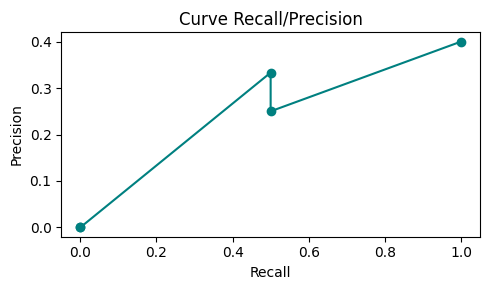

In [60]:
show_plot(recalls, precesions)

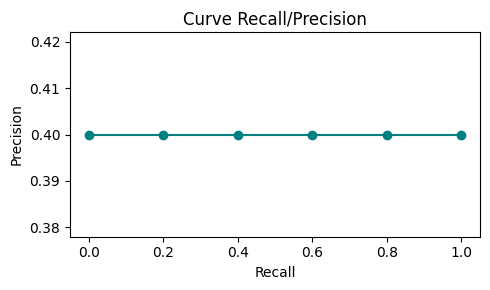

In [ ]:
show_plot(recalls2, precisions2)

In [67]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to generate and display the plot inside an Output widget
def show_plot2(recalls, precisions, output_widget):
    with output_widget:
        clear_output(wait=True)  
        plt.figure(figsize=(5, 3))
        plt.title("Curve Recall/Precision")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.plot(recalls, precisions, color='teal', marker='o')
        plt.tight_layout()
        plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display


border_color = '#ccc'
background_color = '#f9f9f9'
container_background_color = '#f0f0f0'

# Query input with adjusted width
query_input = widgets.Text(
    description='Query:',
    placeholder='Enter your query here',
    layout=widgets.Layout(width='65%')
)

# Submit button with adjusted width
submit_button = widgets.Button(
    description='Search',
    layout=widgets.Layout(width='15%')
)

# Combine query input and submit button in a single line with styling
query_container = widgets.HBox(
    [query_input, submit_button],
    layout=widgets.Layout(
        border=f'2px solid {border_color}',
        border_radius='10px',
        padding='10px',
        background_color=background_color,
        width='80%'  # Adjust container width
    )
)

# Dropdowns for preprocessing and stemming parameters
preprocessing_options = ['Split', 'Reg']
stemming_options = ['Porter', 'Lancaster', 'No Stemming']

preprocessing_dropdown = widgets.Dropdown(
    options=preprocessing_options,
    description='Preprocessing:',
    layout=widgets.Layout(width='45%')
)

stemming_dropdown = widgets.Dropdown(
    options=stemming_options,
    description='Stemming:',
    layout=widgets.Layout(width='45%')
)

# Group preprocessing and stemming dropdowns in a container
preprocessing_container = widgets.HBox(
    [preprocessing_dropdown, stemming_dropdown],
    layout=widgets.Layout(
        border=f'2px solid {border_color}',
        border_radius='10px',
        padding='10px',
        background_color=container_background_color,
        justify_content='space-between',
        width='80%'  # Adjust container width
    )
)

# RadioButtons for file selection with toggle button
file_options = ['DOCS per Term', 'Terms per Doc']
file_selection = widgets.RadioButtons(
    options=file_options,
    description='File Type:',
    layout=widgets.Layout(width='50%')
)

toggle_button = widgets.ToggleButton(
    value=False,
    description='Enable/Disable File Selection',
    button_style='', 
    tooltip='Click to enable/disable the file selection widget',
    layout=widgets.Layout(width='45%')
)

# Combine toggle button and file selection radio buttons
file_selection_container = widgets.HBox(
    [toggle_button, file_selection],
    layout=widgets.Layout(
        border=f'2px solid {border_color}',
        border_radius='10px',
        padding='10px',
        background_color=background_color,
        justify_content='space-between',
        width='80%'  # Adjust container width
    )
)

# Toggle function to enable/disable the file selection
def on_toggle_button_change(change):
    file_selection.disabled = not change['new']  

toggle_button.observe(on_toggle_button_change, names='value')

def is_file_selection_enabled():
    return not file_selection.disabled

# RadioButtons for model selection
models_options = ['Scalar Product', 'Cosine Measure', 'Jaccard Measure','BM25','Boolean']
model_selection = widgets.RadioButtons(
    options=models_options,
    description='Vector space model:',
    layout=widgets.Layout(width='80%')  # Adjust width to match other elements
)

k_input = widgets.Text(
    description='K:',
    placeholder='',
    layout=widgets.Layout(width='65%')
)

b_input = widgets.Text(
    description='B:',
    placeholder='',
    layout=widgets.Layout(width='65%')
)

params_container = widgets.VBox(
    [k_input, b_input],
    layout=widgets.Layout(
        border=f'2px solid {border_color}',
        border_radius='10px',
        padding='15px',
        background_color=background_color,
        width='85%'  # Adjust container width
    )
)


# Group dropdowns and model selection in a single container
dropdowns_container = widgets.VBox(
    [preprocessing_container, file_selection_container, model_selection, params_container],
    layout=widgets.Layout(
        border=f'2px solid {border_color}',
        border_radius='10px',
        padding='15px',
        background_color=background_color,
        width='85%'  # Adjust container width
    )
)



# Create a text area to display results
result_area = widgets.Textarea(
    description='Results:',
    placeholder='Results will be displayed here',
    disabled=False,
    layout=widgets.Layout(
        width='100%',
        height='300px',
    )
)

result_area2 = widgets.Textarea(
    description='Results:',
    placeholder='Results will be displayed here',
    disabled=False,
    layout=widgets.Layout(
        width='100%',
        height='50px',
    )
)

plot_output = widgets.Output()

# Function to handle button click
def on_submit(b):
    query = query_input.value
    preprocessing = preprocessing_dropdown.value
    stemming = stemming_dropdown.value
    selected_file = file_selection.value
    model = model_selection.value
    result_content = ""
    if k_input.value == '':
        k = 0
    else:
        k = float(k_input.value)
    
    if b_input.value == '':
        b = 0
    else:
        b = float(k_input.value)


    if is_file_selection_enabled():
        file_path = ""
        if selected_file == "Terms per Doc":  # descriptive file
            if preprocessing == "Split":
                match stemming:
                    case 'No Stemming':
                        file_path = 'descripteur_split.txt'
                    case 'Porter':
                        file_path = 'descripteur_split_porter.txt'
                    case 'Lancaster':
                        file_path = 'descripteur_split_lancaster.txt'
            else:
                match stemming:
                    case 'No Stemming':
                        file_path = 'descripteur_reg.txt'
                    case 'Porter':
                        file_path = 'descripteur_reg_porter.txt'
                    case 'Lancaster':
                        file_path = 'descripteur_reg_lancaster.txt'
        else:  # inverse file
            if preprocessing == "Split":
                match stemming:
                    case 'No Stemming':
                        file_path = 'inverse_split.txt'
                    case 'Porter':
                        file_path = 'inverse_split_porter.txt'
                        query = Porter.stem(query)
                    case 'Lancaster':
                        file_path = 'inverse_split_lancaster.txt'
                        query = Lancaster.stem(query)
            else:
                match stemming:
                    case 'No Stemming':
                        file_path = 'inverse_reg.txt'
                    case 'Porter':
                        file_path = 'inverse_reg_porter.txt'
                        query = Porter.stem(query)
                        mdict = rsv(query,'Porter','Reg')
                        print(mdict)
                        for doc,v in mdict.items():
                            formatted_line = f"{doc:<3} {v:<3}\n"
                            result_content += formatted_line
                    case 'Lancaster':
                        file_path = 'inverse_reg_lancaster.txt'
                        query = Lancaster.stem(query)

        # Initialize result content with the correct header and numbered lines
        line_counter = 1
        if selected_file == "Terms per Doc":
            result_content = "N  Ndoc   Term           Freq   Weight  Positions\n"
        
            # Track terms and frequencies for the selected document
            term_count = 0
        
        
             # Filter the file content based on query and file type
            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                for line in lines:
                    parts = line.split()
                    if parts[0] == query:
                        # Format and add the numbered line to result_content
                        formatted_line = f"{line_counter:<3} {parts[0]:<5} {parts[1]:<15} {parts[2]:<5} {parts[3]:<10} {parts[4]:<10}\n"
                        result_content += formatted_line
                        line_counter += 1
                        term_count += int(parts[2])  # Increment by term frequency
                
            # Append document vocabulary and size
            result_content += f"-------------------------------------------------------------------"
            result_content += f"\n# Doc vocabulary: {line_counter-1}               "
            result_content += f"# Doc size: {term_count}\n"
    
        else:
            result_content = "N   Term            Ndoc   Freq   Weight\n"
        
            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                for line in lines:
                    parts = line.split()
                    if parts[1] == query:
                        formatted_line = f"{parts[0]:<3} {parts[1]:<15} {parts[2]:<5} {parts[3]:<5} {parts[4]:<10}\n"
                        result_content += formatted_line
                        line_counter += 1

  
        if line_counter == 1:  # Only header is present
            result_content += "No matching results found."
    
    else:
        if model== 'Scalar Product':
            my_dict = rsv(query,stemming,preprocessing)
            #print('test')

        elif model == 'Cosine Measure':
            my_dict = cosine(query,stemming,preprocessing)

        elif model == 'Jaccard Measure':
            my_dict = jaccard(query,stemming,preprocessing)

        elif model == 'BM25':
            my_dict = bm25(query,stemming,preprocessing,k,b)
        
        elif model == 'Boolean':
            my_dict = boolean_model(query,stemming,preprocessing)

        
        if model == 'Boolean':

            if my_dict ==None:
                result_content = 'query not valid '
            else:
                for doc,v in my_dict.items():
                    formatted_line = f"{doc:<3} {str(v):<3}\n"
                    result_content += formatted_line

        
        else:
            for doc,v in my_dict.items():
                formatted_line = f"{doc:<3} {v:<3}\n"
                result_content += formatted_line

        p , p5 , p10 , r ,  F_score , precesions , recalls , precisions2 , recalls2 = model_evaluation(query,my_dict)
        result_area2.value = f'precision = {p} , p@5 = {p5} , p@10 = {p10} , recall = {r} , F_score = {F_score}'

        if len(recalls2) == len(precisions2):
            show_plot2(recalls2, precisions2, plot_output)
        else:
            with plot_output:
                clear_output(wait=True)
                print("Error: Recall and Precision arrays must have the same length.")


        
    
    result_area.value = result_content

submit_button.on_click(on_submit)

# Display all widgets
display(query_container, dropdowns_container, result_area, result_area2,plot_output)
#information retrieval
#Large language models (LLM)

Textarea(value='', description='Results:', layout=Layout(height='300px', width='100%'), placeholder='Results w…

Textarea(value='', description='Results:', layout=Layout(height='50px', width='100%'), placeholder='Results wi…

Output()

['4', '1', '6', '5', '2']
2
['2', '6']
selected_relevant_docs: 2
len(real_relevant_docs) 2
i + 1  1
selected_relevant_docs 0
i + 1  2
selected_relevant_docs 0
i + 1  3
selected_relevant_docs 1
i + 1  4
selected_relevant_docs 1
i + 1  5
selected_relevant_docs 2
